In [133]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission (3).csv
Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
import joblib

# Display options
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")

In [135]:
# Load datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

In [136]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Sample submission shape:", sample.shape)

Train shape: (1460, 81)
Test shape: (1459, 80)
Sample submission shape: (1459, 2)


In [137]:
print("Train Dataset Preview:")
display(train.head())

print("Test Dataset Preview:")
display(test.head())

print("Sample Submission Format:")
display(sample.head())

Train Dataset Preview:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Test Dataset Preview:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Sample Submission Format:


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [138]:
print("Train Columns and Types:")
print(train.dtypes)

print("\nTest Columns and Types:")
print(test.dtypes)

Train Columns and Types:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Test Columns and Types:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object


In [139]:
missing_train = train.isnull().sum().sort_values(ascending=False)
print("Top 20 Columns with Missing Values in Train:")
print(missing_train[missing_train > 0].head(20))

Top 20 Columns with Missing Values in Train:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


Basic statistics of target column 'SalePrice':


,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


Text(0.5, 0, 'SalePrice')

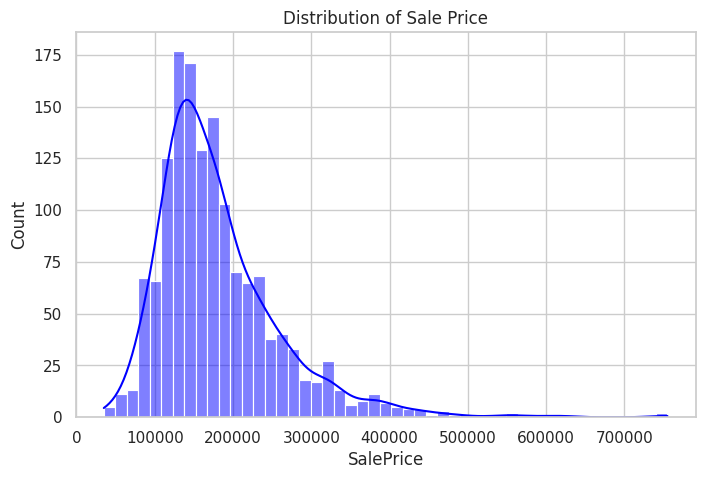

In [140]:
print("Basic statistics of target column 'SalePrice':")
display(train["SalePrice"].describe())

# distribution
plt.figure(figsize=(8,5))
sns.histplot(train['SalePrice'], kde=True, color='blue')
plt.title('Distribution of Sale Price')
plt.xlabel('SalePrice')

In [141]:
# features having missing values
none_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
             'GarageQual', 'GarageFinish', 'GarageType', 'GarageCond',
             'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1',
             'MasVnrType']

for col in none_cols:
    train[col] = train[col].fillna('None')

In [142]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

In [143]:
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [144]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [145]:
print("Missing values left in Train:")
train.isnull().sum().sort_values(ascending=False).head()

Missing values left in Train:


,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0


In [146]:
# Save target variable
train_labels = train['SalePrice']

# Add origin indicator for separation later
train['DataSplit'] = 'train'
test['DataSplit'] = 'test'
test['SalePrice'] = np.nan

In [147]:
full_data = pd.concat([train, test], axis=0)
print("Combined shape:", full_data.shape)

Combined shape: (2919, 82)


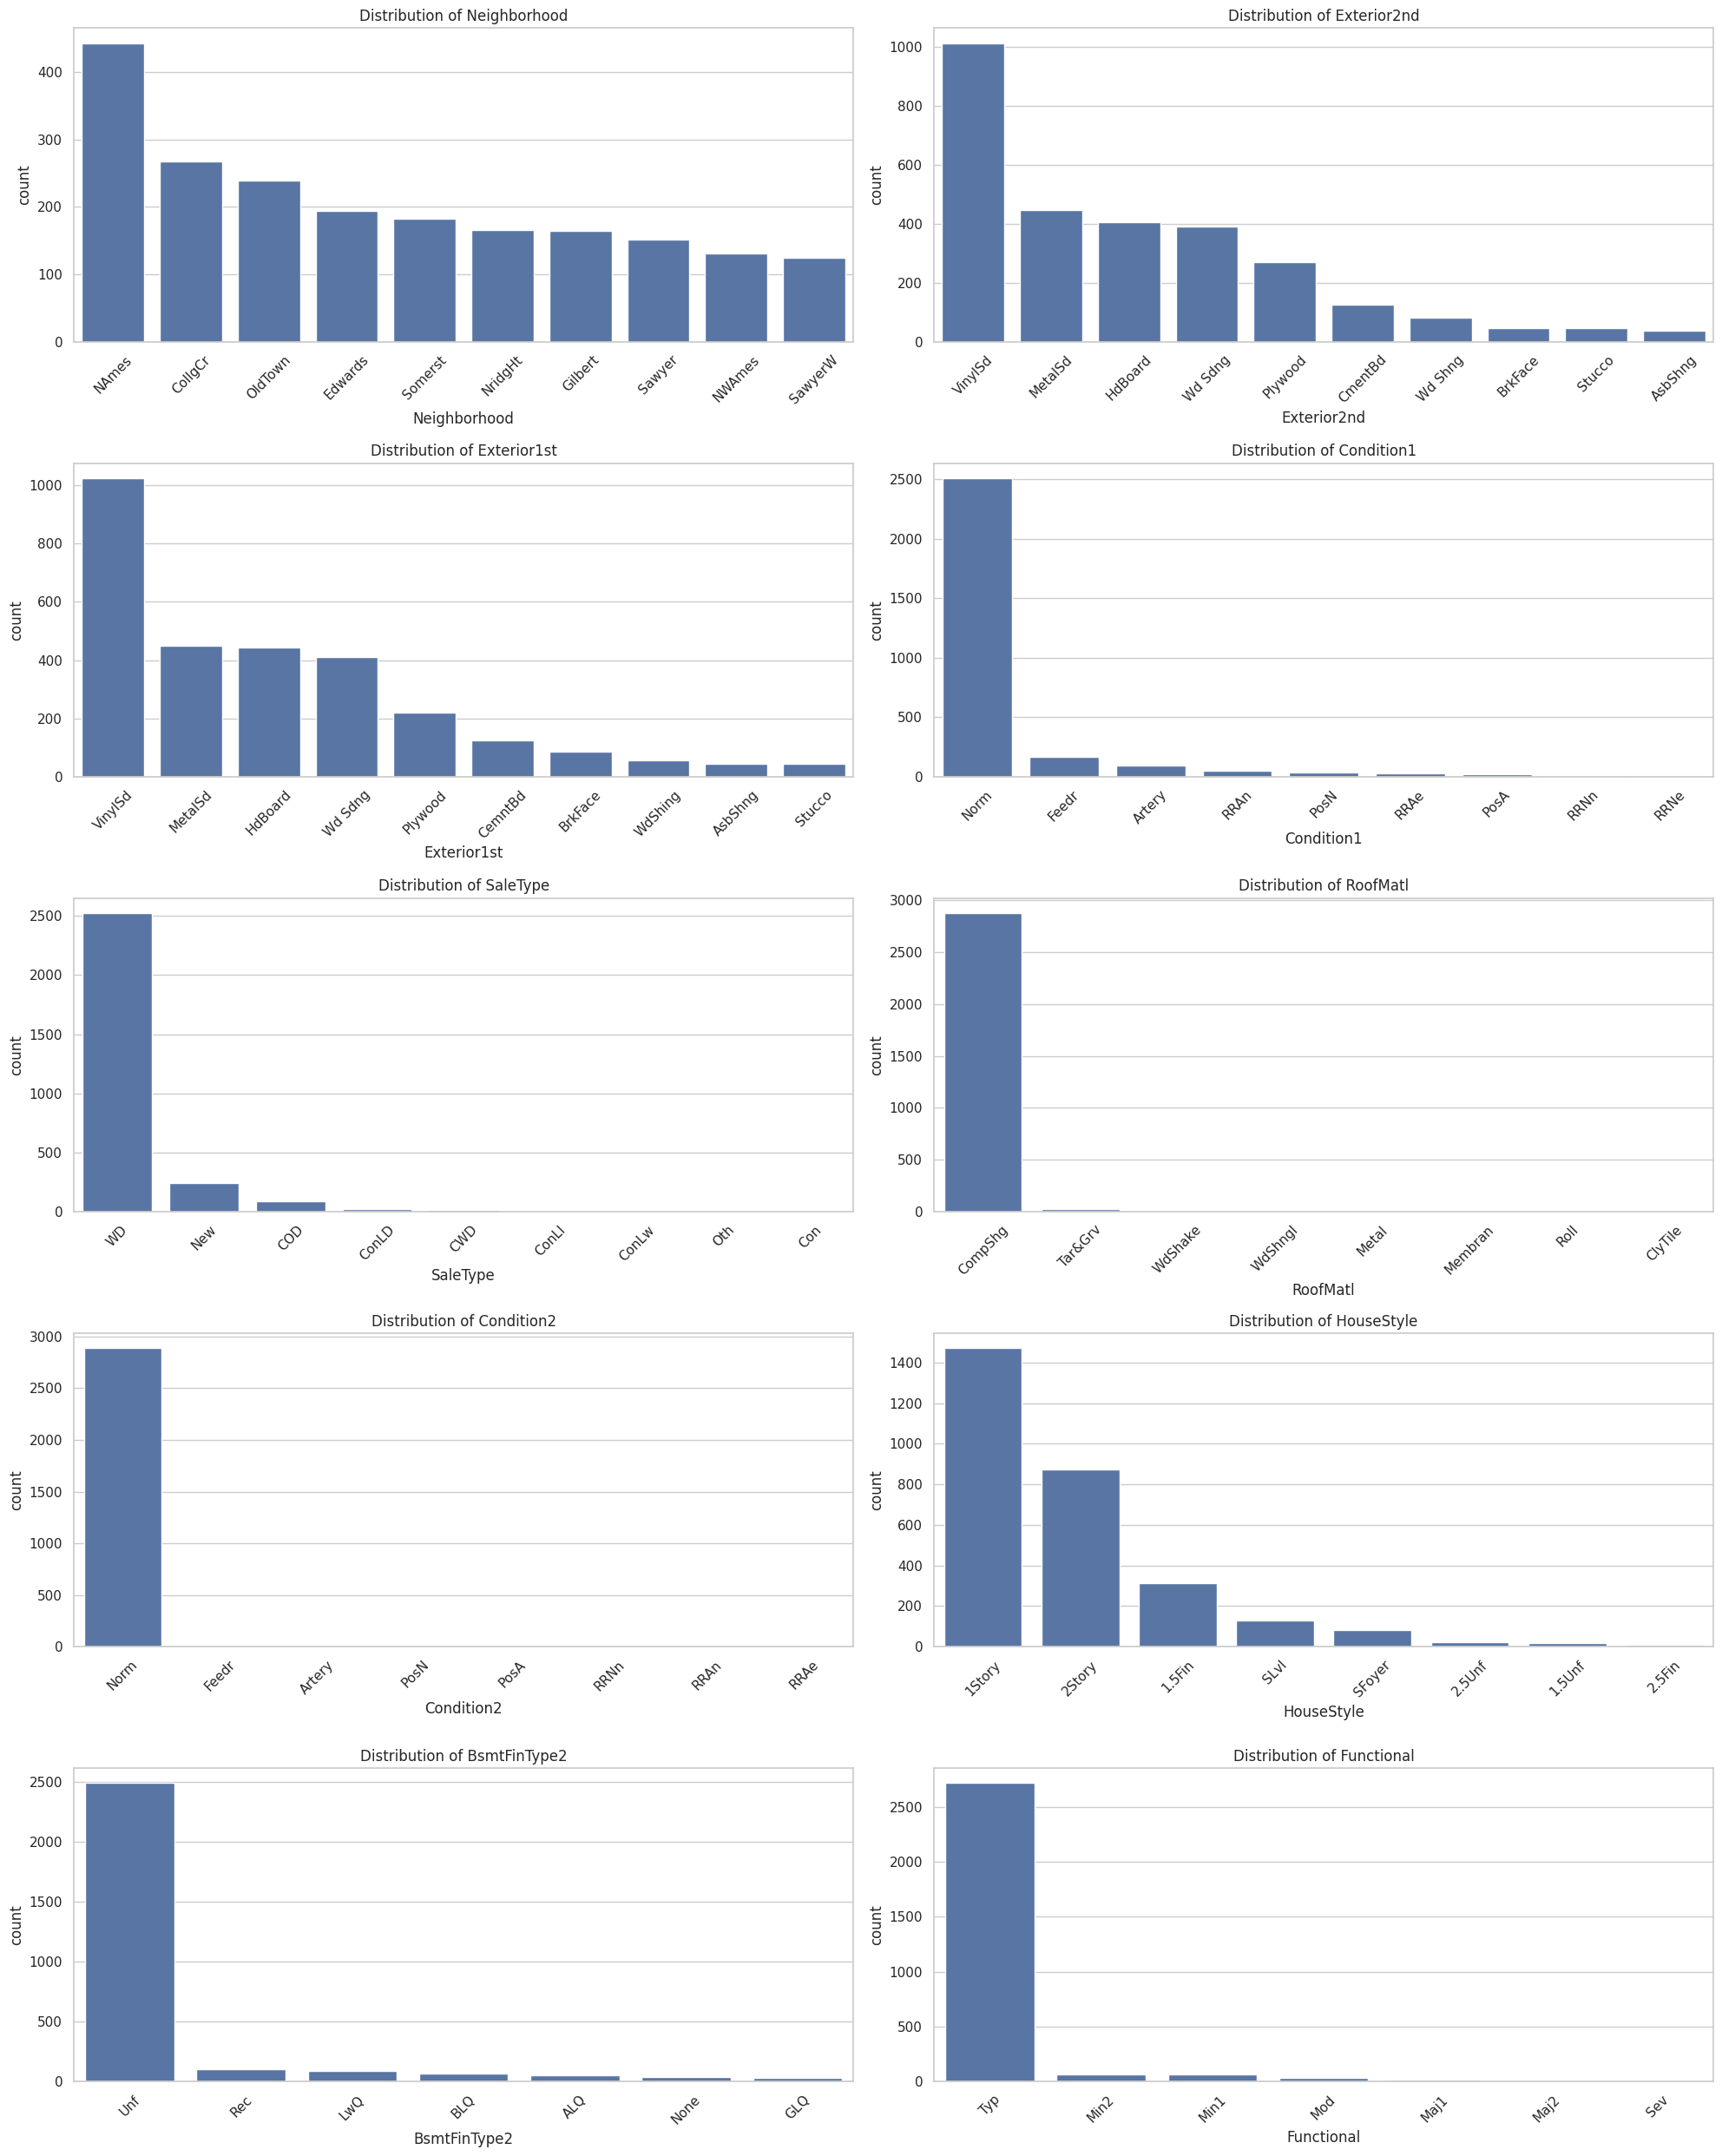

In [148]:
#10 most frequent categorical plots
cat_cols = full_data.select_dtypes(include='object').nunique().sort_values(ascending=False).head(10).index

plt.figure(figsize=(20, 25))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 2, i)
    top_categories = full_data[col].value_counts().nlargest(10).index
    sns.countplot(data=full_data[full_data[col].isin(top_categories)], x=col, order=top_categories)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

Top 10 Correlated Features:
 OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Text(0.5, 1.0, 'Top Correlated Features with SalePrice')

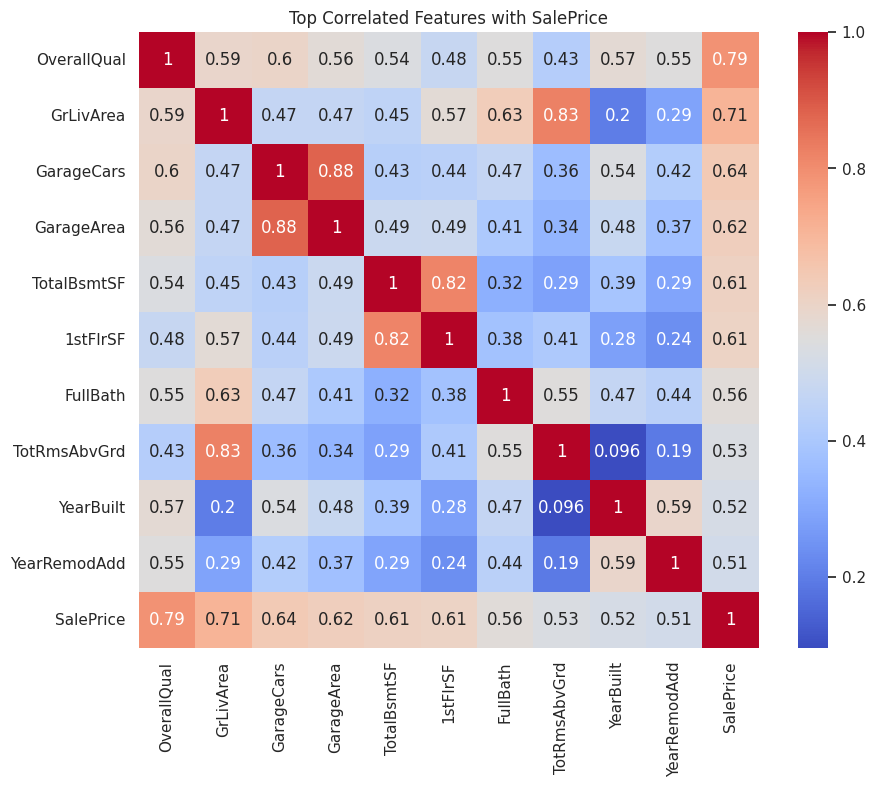

In [149]:
# Get numeric features
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Correlation
correlation = train[numeric_cols].corr()['SalePrice'].sort_values(ascending=False)
top_corr = correlation[1:11]
print("Top 10 Correlated Features:\n", top_corr)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(train[top_corr.index.tolist() + ['SalePrice']].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlated Features with SalePrice")

In [150]:
# One-hot encoding for categorical columns
full_data_encoded = pd.get_dummies(full_data, drop_first=True)
print("Encoded shape:", full_data_encoded.shape)

Encoded shape: (2919, 262)


In [151]:
# split information before encoding
train_indices = full_data['DataSplit'] == 'train'
test_indices = full_data['DataSplit'] == 'test'
full_data_encoded = pd.get_dummies(full_data, drop_first=True)

# original masks
final_train = full_data_encoded[train_indices].drop(columns=['SalePrice', 'DataSplit_train'], errors='ignore')
final_test = full_data_encoded[test_indices].drop(columns=['SalePrice', 'DataSplit_train'], errors='ignore')

In [152]:
from sklearn.preprocessing import StandardScaler

# 1. Recreate base X_train and y_train from your encoded and split data
X_train = final_train.copy()
y_train = train_labels.copy()

# 2. Remove outliers using IQR
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
non_outliers = (y_train >= lower_bound) & (y_train <= upper_bound)

X_train = X_train[non_outliers]
y_train = y_train[non_outliers]

# 3. Log-transformation
y_train_log = np.log1p(y_train)

# 4. Scale training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

<Figure size 1000x1200 with 0 Axes>

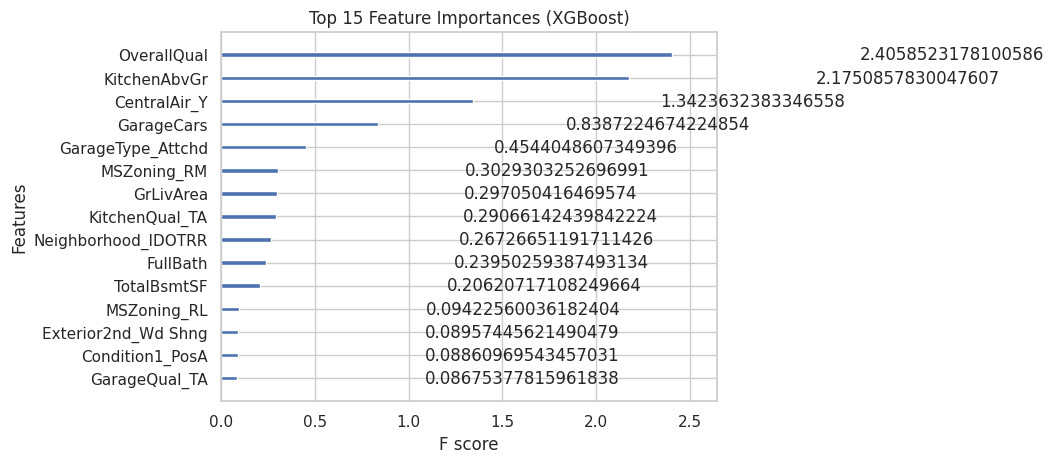

In [153]:
from xgboost import XGBRegressor, plot_importance

model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train_log)

plt.figure(figsize=(10, 12))
plot_importance(model, max_num_features=15, importance_type='gain')
plt.title("Top 15 Feature Importances (XGBoost)")
plt.show()

In [154]:
# Total Livable Area
full_data['Total_Livable_Area'] = full_data['GrLivArea'] + full_data['TotalBsmtSF']

# Age of House at Sale
full_data['House_Age_At_Sale'] = full_data['YrSold'] - full_data['YearBuilt']

# Years Since Remodel
full_data['Years_Since_Remodel'] = full_data['YrSold'] - full_data['YearRemodAdd']

# Porch Area Ratio
porch_sum = full_data[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].sum(axis=1)
full_data['Porch_Ratio'] = porch_sum / full_data['GrLivArea']
full_data['Porch_Ratio'] = full_data['Porch_Ratio'].replace(np.inf, 0).fillna(0)

# Bathroom-to-Bedroom Ratio
bathrooms = (full_data['FullBath'] + 0.5 * full_data['HalfBath'] +
             full_data['BsmtFullBath'] + 0.5 * full_data['BsmtHalfBath'])
full_data['Bath_to_Bedroom'] = bathrooms / full_data['BedroomAbvGr']
full_data['Bath_to_Bedroom'] = full_data['Bath_to_Bedroom'].replace(np.inf, 0).fillna(0)

In [155]:
#Quality vs Condition
full_data['OverallQualCond_Ratio'] = full_data['OverallQual'] / full_data['OverallCond']
full_data['OverallQualCond_Ratio'] = full_data['OverallQualCond_Ratio'].replace(np.inf, 0).fillna(0)

In [156]:
# Binary indicator for proximity to parks or greenbelt
def pos_feature(x):
    return int(('PosN' in x) or ('PosA' in x))

full_data['Near_Positive_Feature'] = full_data[['Condition1', 'Condition2']].apply(
    lambda row: pos_feature(row['Condition1']) or pos_feature(row['Condition2']), axis=1)

In [157]:
quality_features = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
                    'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
                    'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

# Replace quality ratings with numeric values
qual_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0, np.nan:0}
for col in quality_features:
    full_data[col] = full_data[col].map(qual_map).fillna(0)

# Weighted sum (you can change the weights later)
weights = {'OverallQual':2, 'KitchenQual':2, 'ExterQual':1.5}
full_data['Composite_Quality_Score'] = sum(
    full_data[col] * weights.get(col, 1) for col in quality_features
)

In [158]:
# 8. Binary flags for presence
flag_cols = ['Alley', 'BsmtQual', 'GarageType', 'PoolQC', 'Fence', 'MiscFeature']
for col in flag_cols:
    full_data[f'Has_{col}'] = np.where(full_data[col] == 'None', 0, 1)

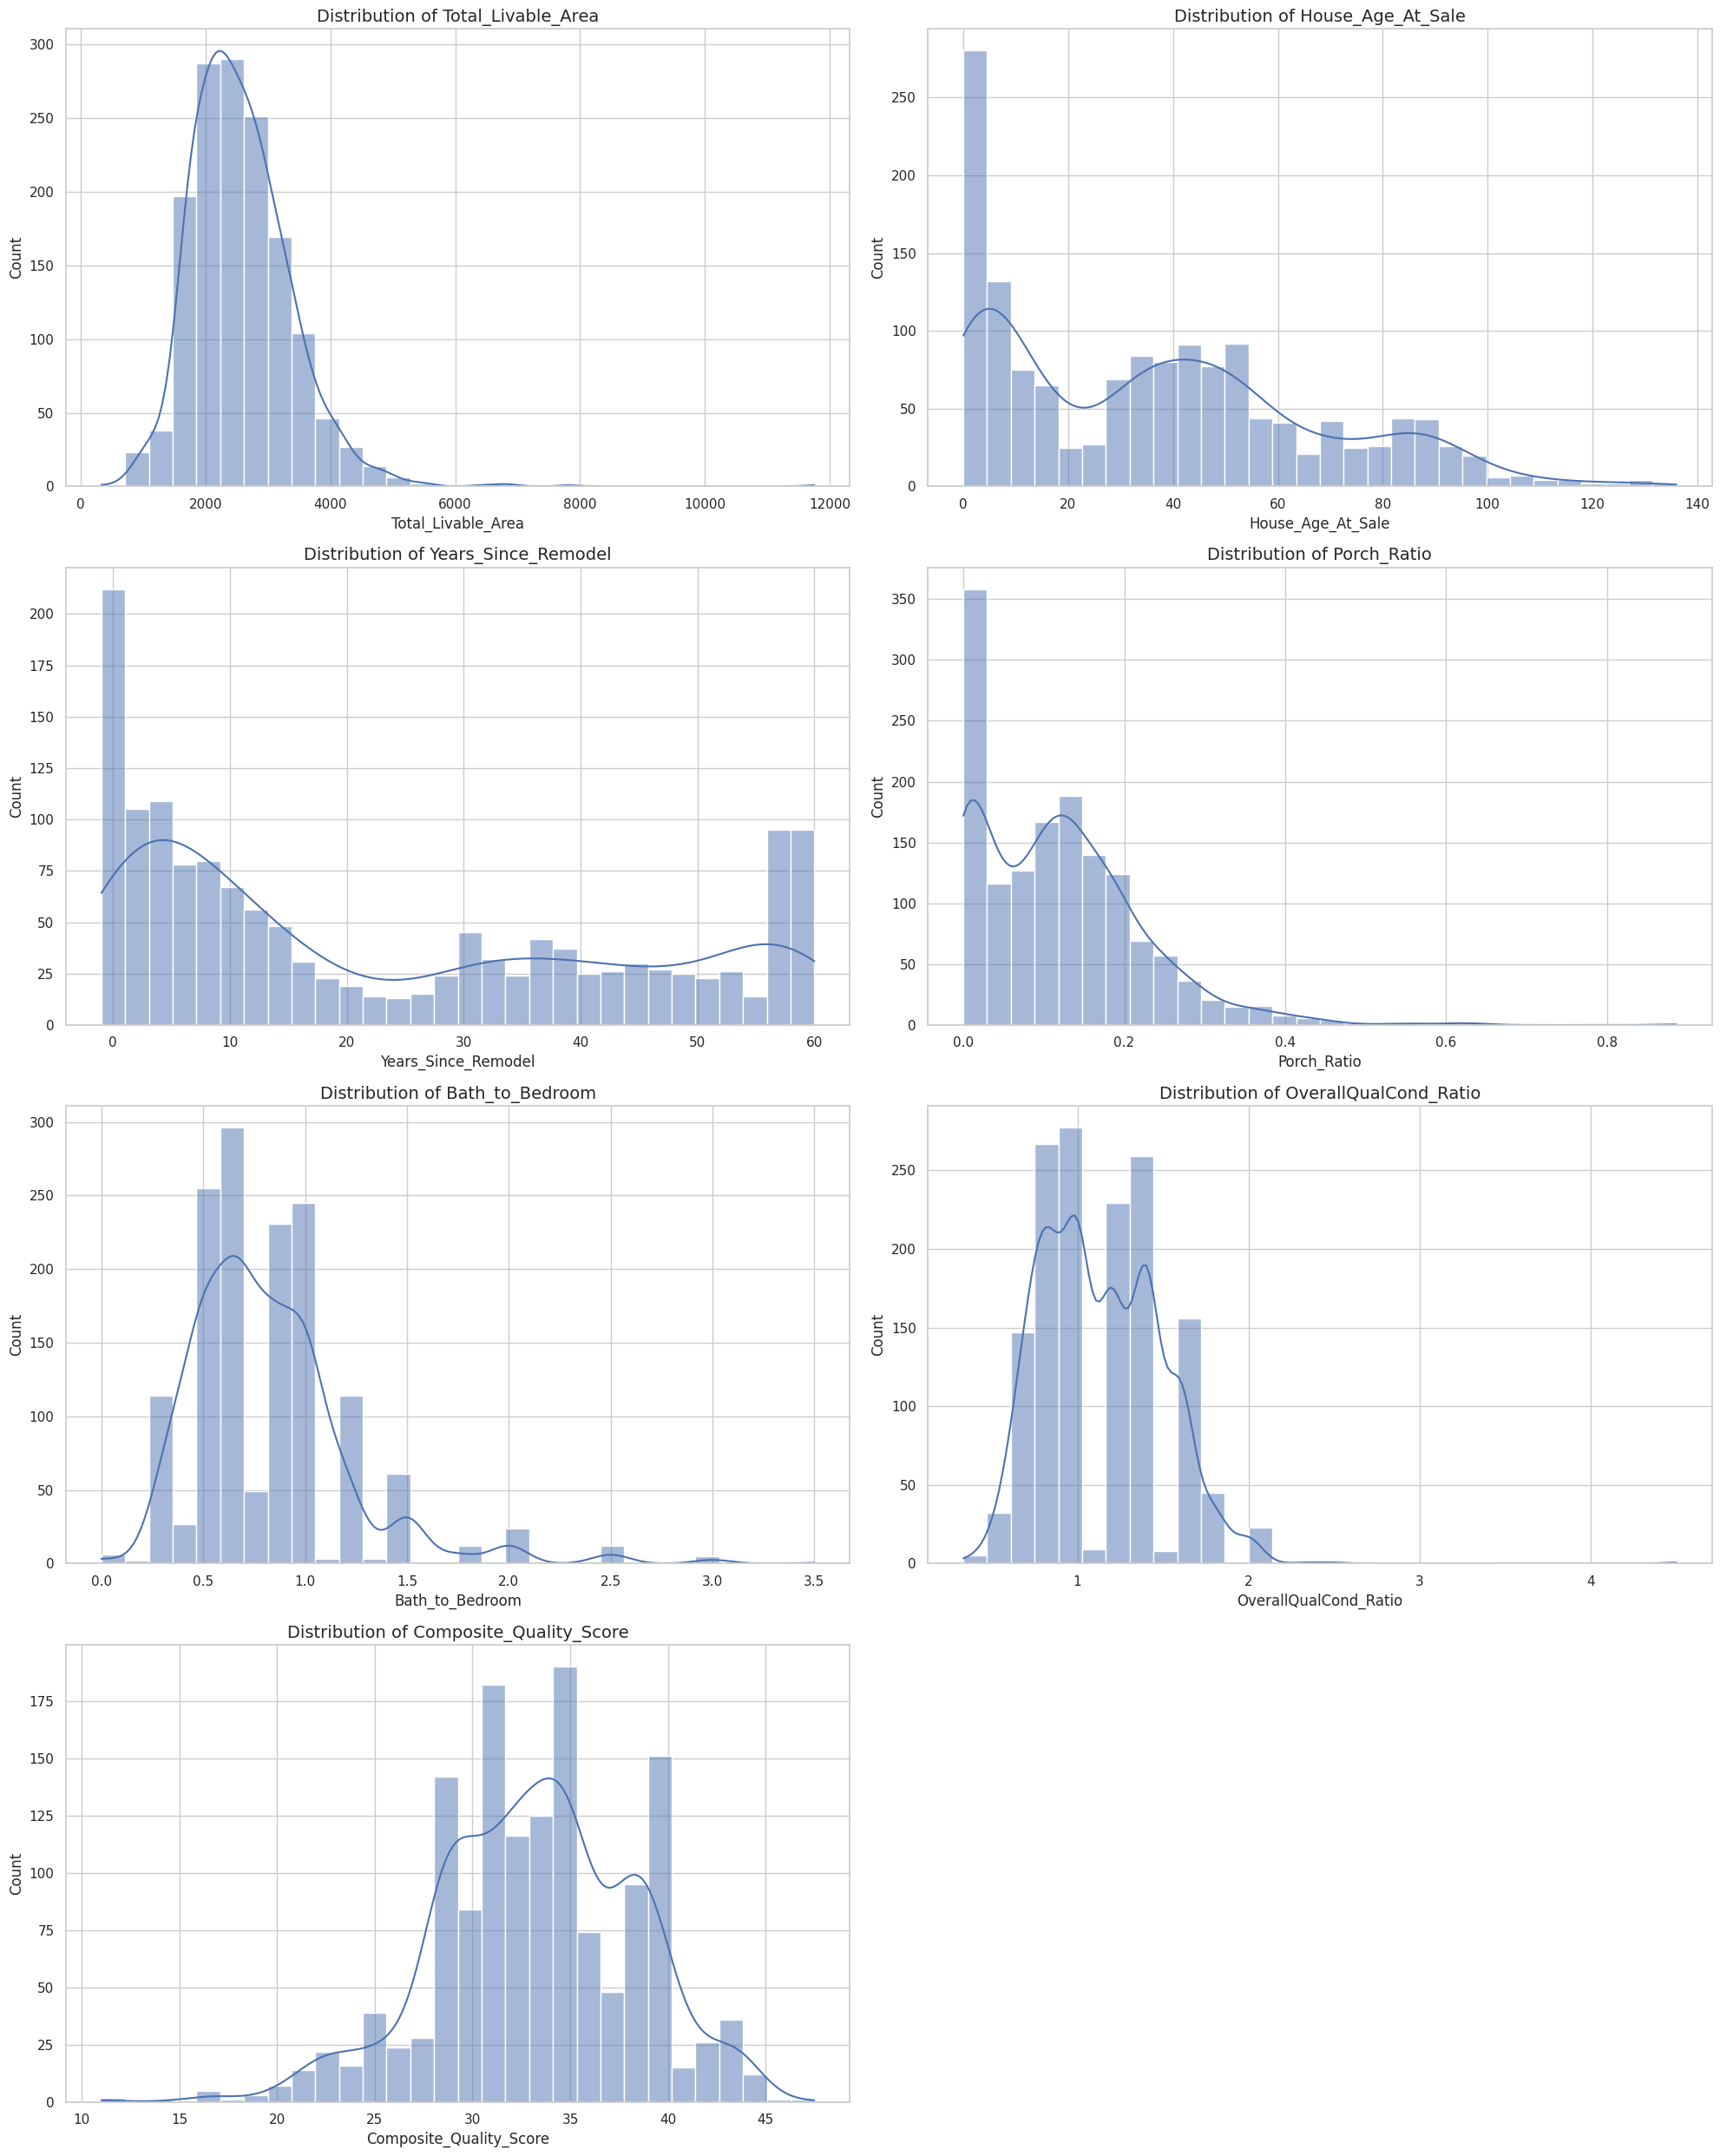

In [159]:
# List of engineered features
engineered_features = [
    'Total_Livable_Area', 'House_Age_At_Sale', 'Years_Since_Remodel',
    'Porch_Ratio', 'Bath_to_Bedroom', 'OverallQualCond_Ratio',
    'Composite_Quality_Score'
]

# Distribution plots
plt.figure(figsize=(20, 25))
for i, col in enumerate(engineered_features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(full_data[full_data['DataSplit'] == 'train'][col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=14)
plt.tight_layout()

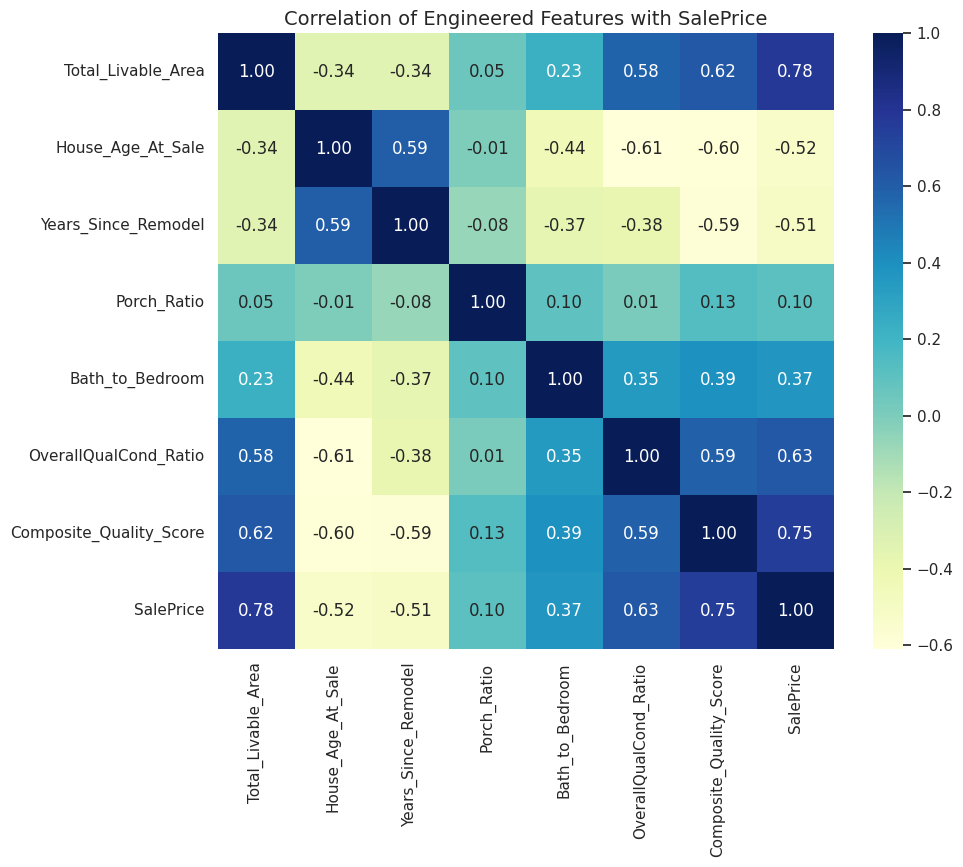

In [160]:
# Filter only train data to correlate with actual SalePrice
train_data = full_data[full_data['DataSplit'] == 'train']

heatmap_features = [
    'Total_Livable_Area', 'House_Age_At_Sale', 'Years_Since_Remodel',
    'Porch_Ratio', 'Bath_to_Bedroom', 'OverallQualCond_Ratio',
    'Composite_Quality_Score', 'SalePrice'
]

# correlation matrix
corr_matrix = train_data[heatmap_features].corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', square=True)
plt.title('Correlation of Engineered Features with SalePrice', fontsize=14)
plt.show()

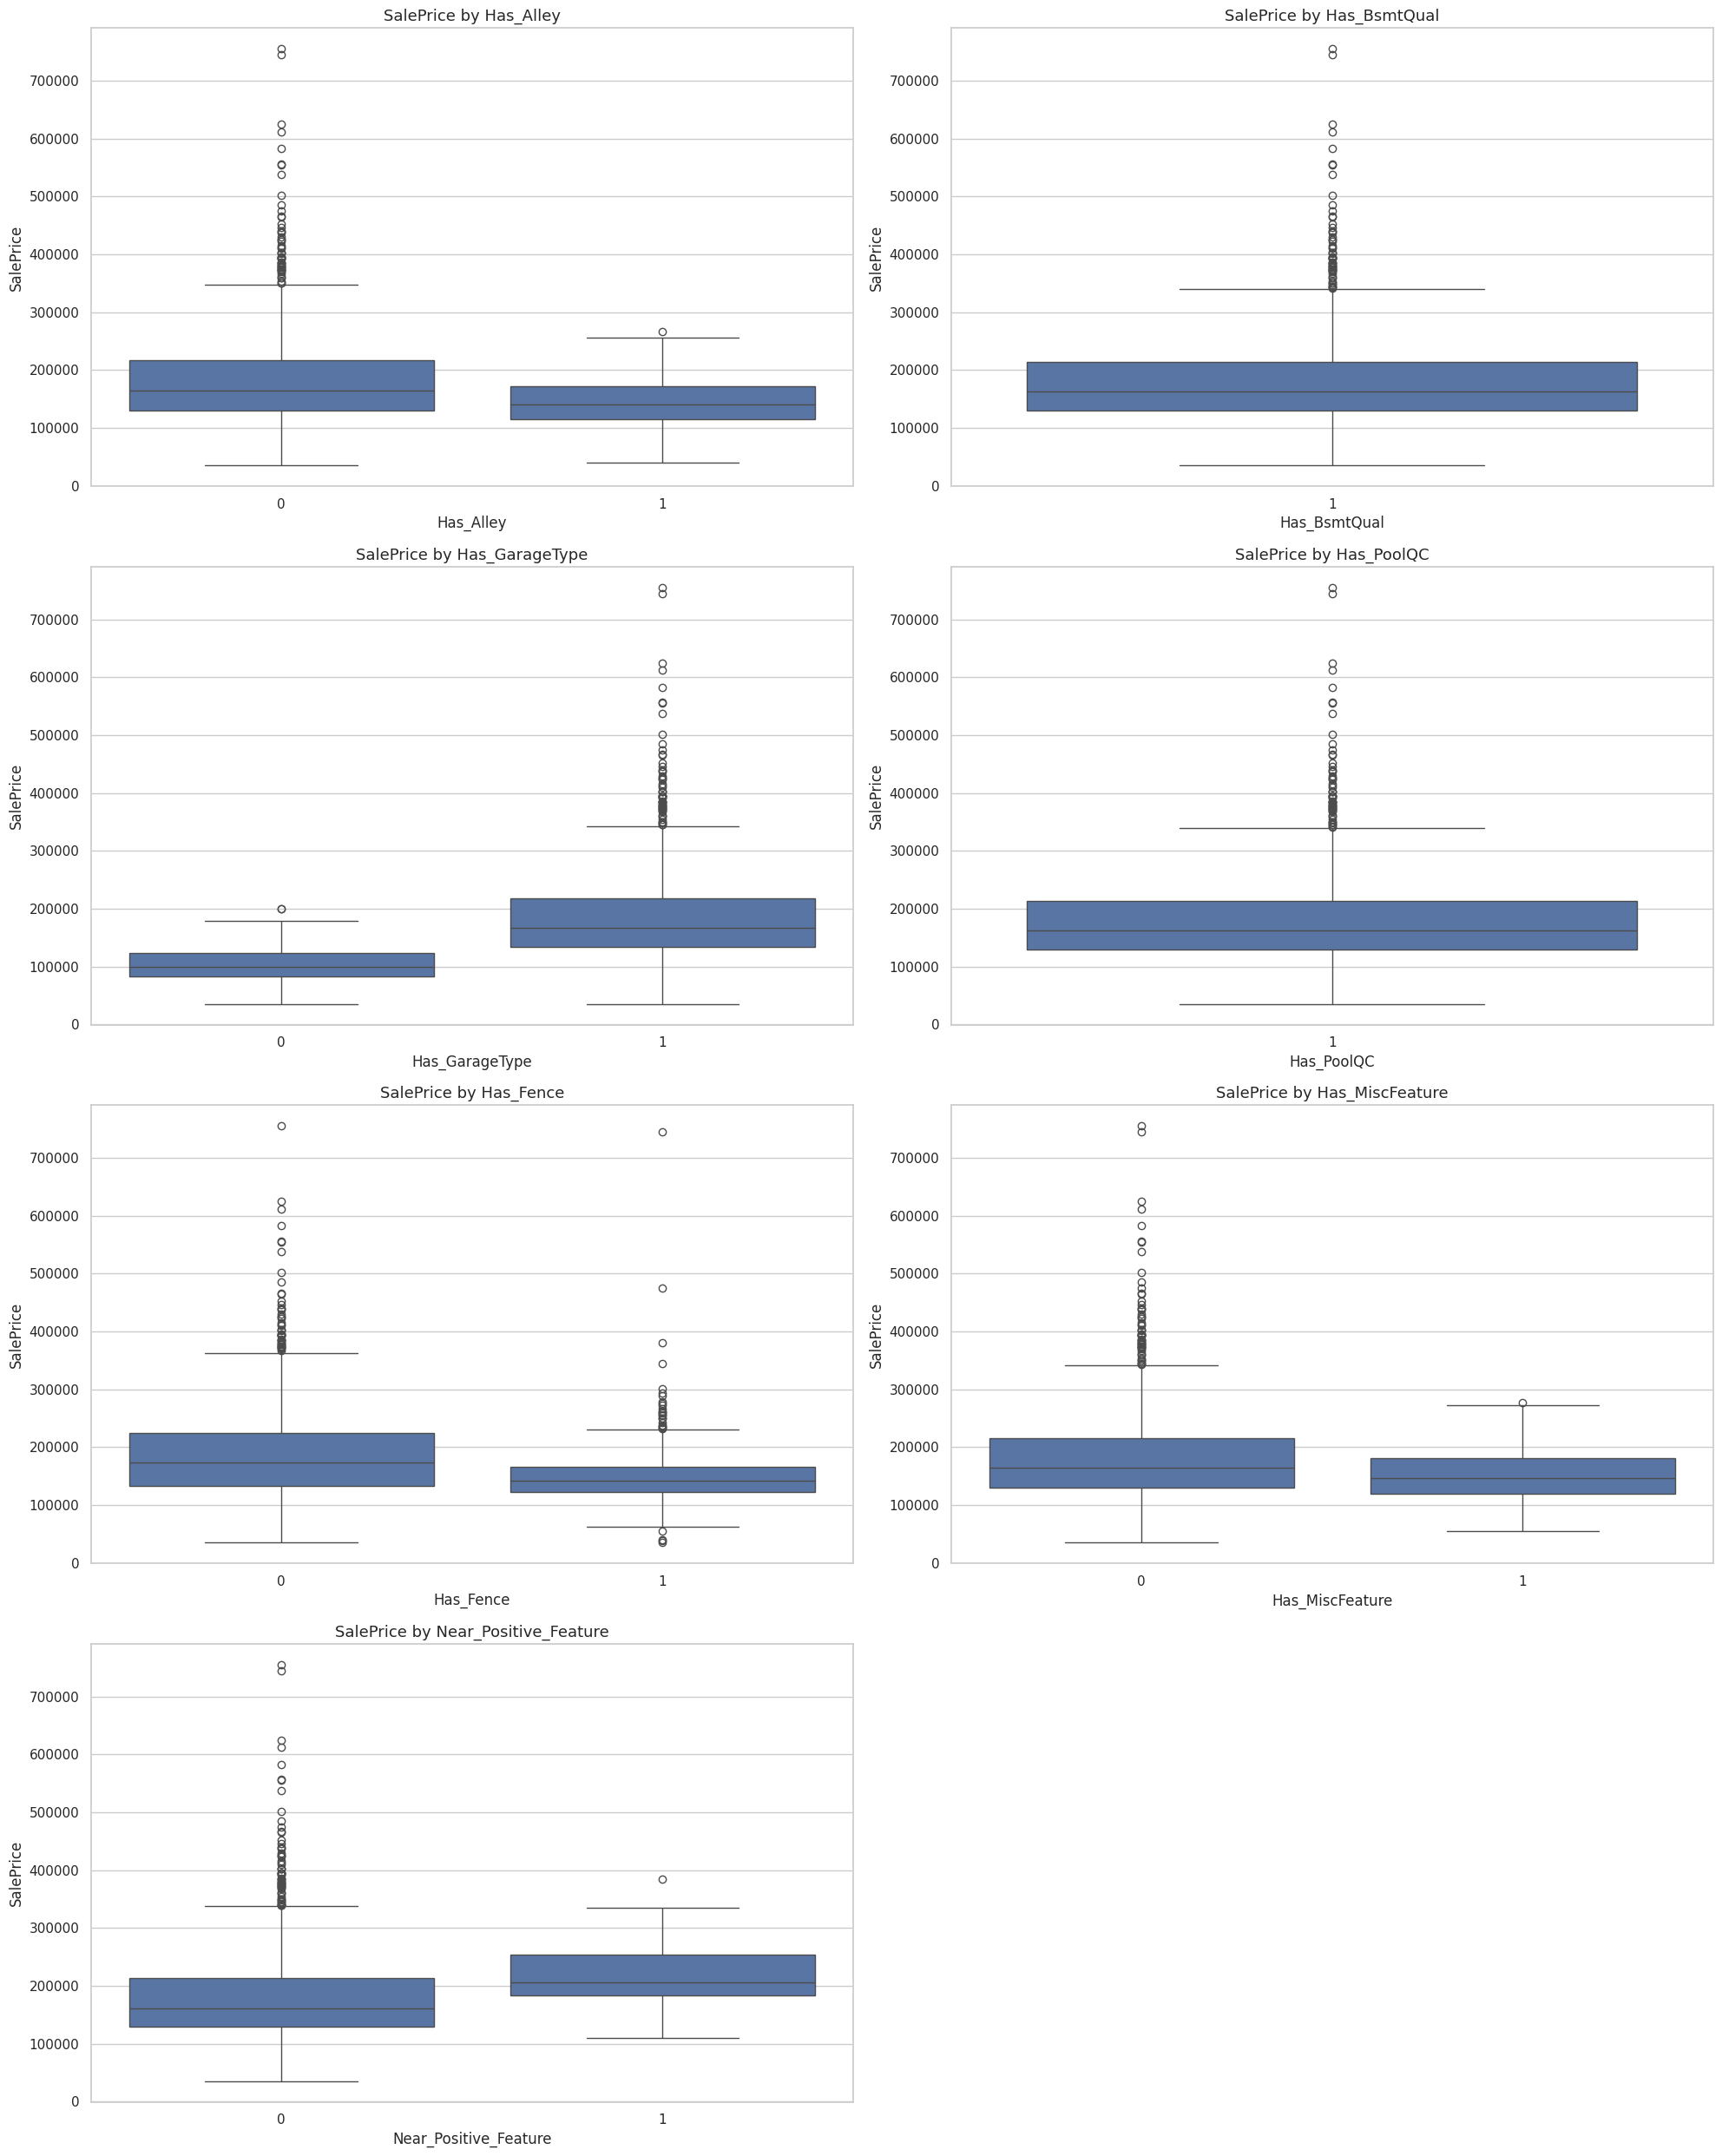

In [161]:
# Binary features
binary_flags = [
    'Has_Alley', 'Has_BsmtQual', 'Has_GarageType', 'Has_PoolQC',
    'Has_Fence', 'Has_MiscFeature', 'Near_Positive_Feature'
]

train_data = full_data[full_data['DataSplit'] == 'train']

# Boxplots
plt.figure(figsize=(20, 25))
for i, col in enumerate(binary_flags, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=train_data[col], y=train_data['SalePrice'])
    plt.title(f'SalePrice by {col}', fontsize=13)
    plt.xlabel(col)
    plt.ylabel('SalePrice')
plt.tight_layout()

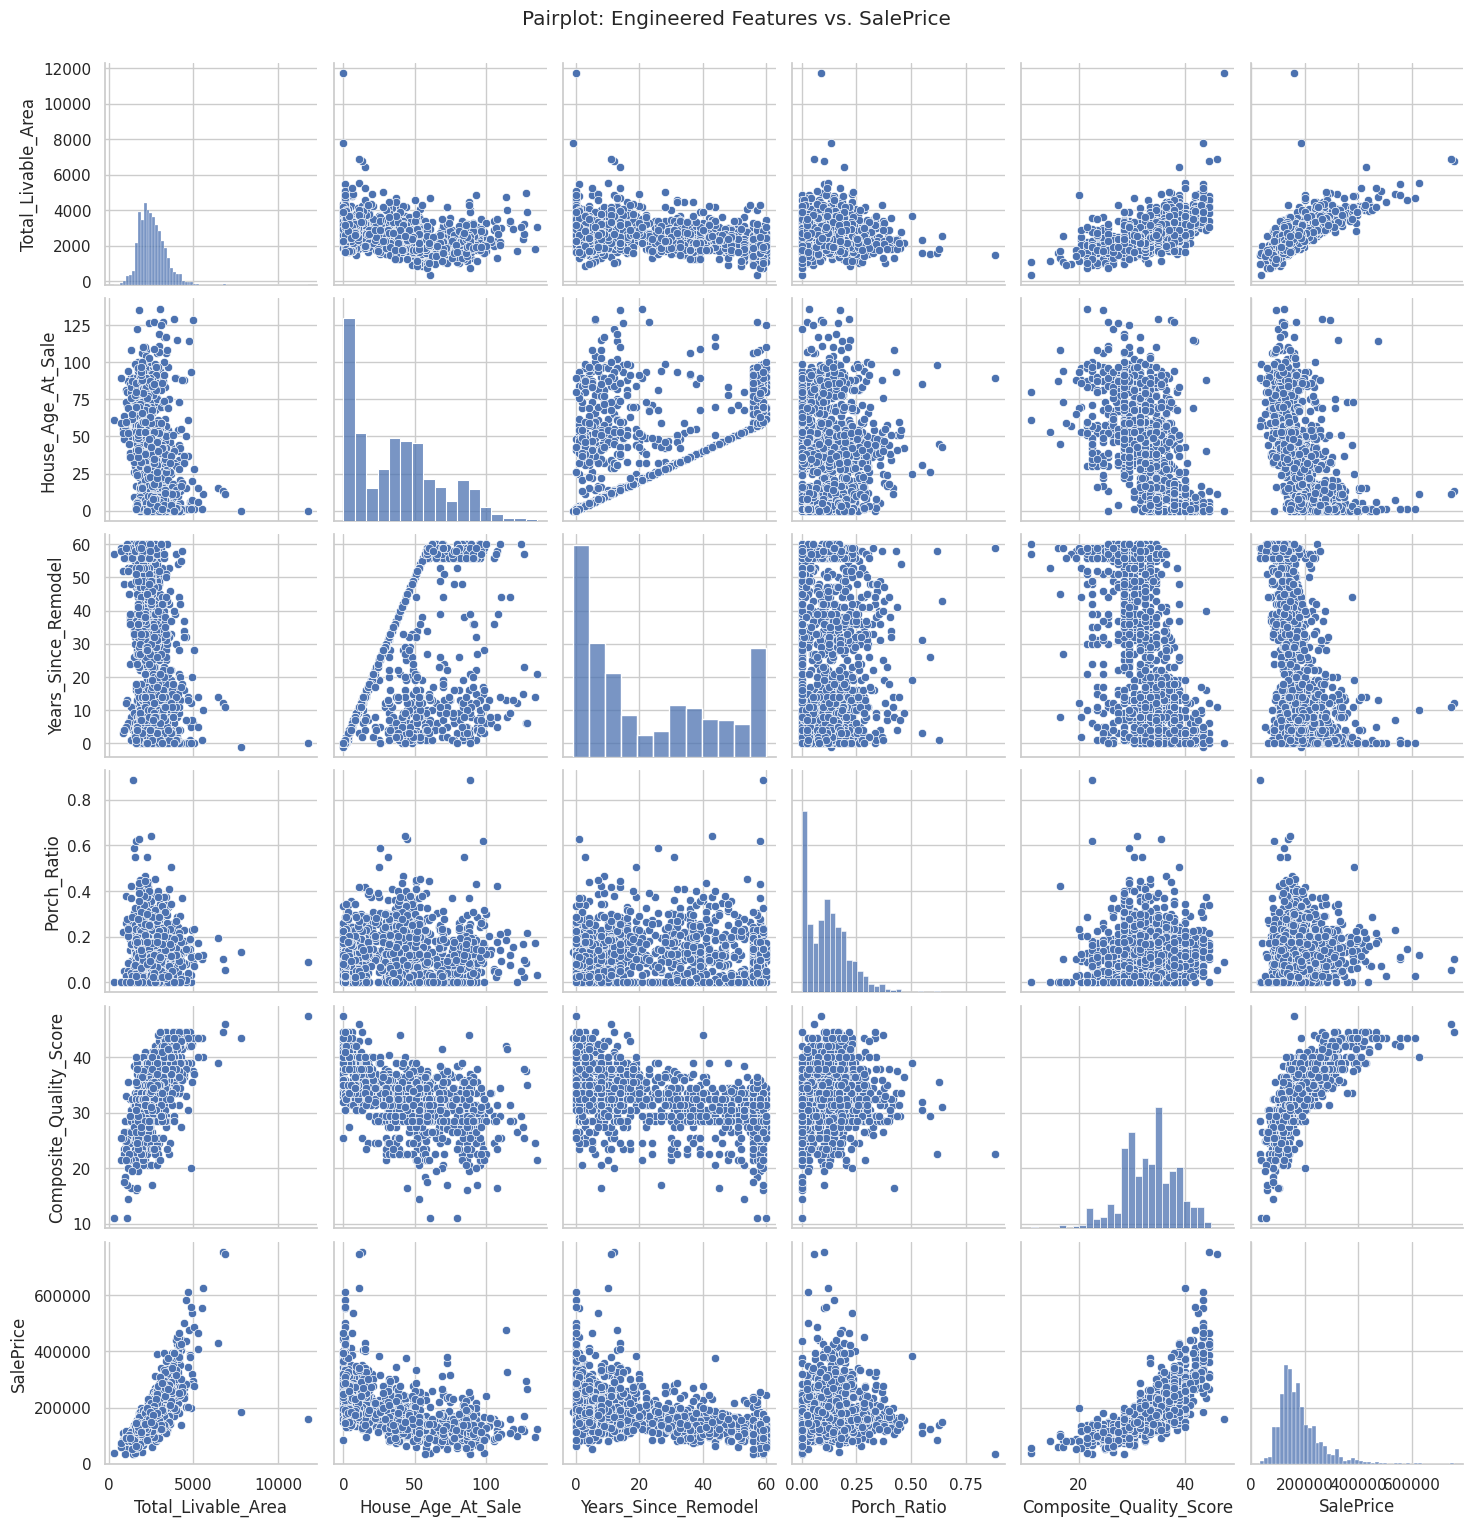

In [162]:
# Selecting key engineered features and target
pairplot_features = [
    'Total_Livable_Area',
    'House_Age_At_Sale',
    'Years_Since_Remodel',
    'Porch_Ratio',
    'Composite_Quality_Score',
    'SalePrice'
]

# Only on train data
sns.pairplot(full_data[full_data['DataSplit'] == 'train'][pairplot_features])
plt.suptitle('Pairplot: Engineered Features vs. SalePrice', y=1.02)
plt.show()

In [163]:
# Ordinal encoding map (repeat if necessary)
qual_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0, np.nan:0}
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                'HeatingQC', 'KitchenQual', 'FireplaceQu',
                'GarageQual', 'GarageCond', 'PoolQC']

for col in ordinal_cols:
  if full_data[col].dtype == 'object':
    full_data[col] = full_data[col].map(qual_map).fillna(0)

In [164]:
# number of training rows
n_train = train.shape[0]

# Drop 'DataSplit' only if it exists
if 'DataSplit' in full_data.columns:
    full_data = full_data.drop('DataSplit', axis=1)

# Identify nominal (object type) columns *after* dropping 'DataSplit'
nominal_cols = full_data.select_dtypes(include='object').columns

# Perform one-hot encoding on nominal features
full_data_encoded = pd.get_dummies(full_data, columns=nominal_cols, drop_first=True)

# Split encoded data back into training and test sets
final_train = full_data_encoded.iloc[:n_train, :]
final_test = full_data_encoded.iloc[n_train:, :].drop(columns=['SalePrice'], errors='ignore')

# Recover target variable if needed
train_labels = train['SalePrice']

# Confirm the shapes
print(" Final training shape:", final_train.shape)
print(" Final test shape:", final_test.shape)

✅ Final training shape: (1460, 245)
✅ Final test shape: (1459, 244)


In [165]:
n_train = train.shape[0]

train_final = full_data_encoded.iloc[:n_train, :]
test_final = full_data_encoded.iloc[n_train:, :].drop(columns=['SalePrice'], errors='ignore')

X_train = train_final.drop('SalePrice', axis=1)
y_train = train_final['SalePrice']

In [166]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [167]:
X_test_scaled = scaler.transform(test_final)

In [168]:
# Keep column names for clarity
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=test_final.columns, index=test_final.index)

In [169]:
# Log-transformation
y_train_log = np.log1p(y_train)

In [170]:
# Recreate scaler and scaled X after outlier filtering
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Regenerate log-transformed y
y_train_log = np.log1p(y_train)

In [171]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=10),
    "Lasso Regression": Lasso(alpha=0.001),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

In [172]:
from sklearn.model_selection import train_test_split

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train_log, test_size=0.2, random_state=42)

results = {}

for name, model in models.items():
    model.fit(X_train_final, y_train_final)

    y_pred_log = model.predict(X_val)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_val)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    results[name] = {"RMSE": rmse, "R2 Score": r2}

for model_name, scores in sorted(results.items(), key=lambda x: x[1]['RMSE']):
    print(f"{model_name:20s} | RMSE: {scores['RMSE']:.2f} | R²: {scores['R2 Score']:.4f}")

Ridge Regression     | RMSE: 26525.05 | R²: 0.9083
ElasticNet           | RMSE: 26815.54 | R²: 0.9063
Linear Regression    | RMSE: 26895.93 | R²: 0.9057
Lasso Regression     | RMSE: 26953.84 | R²: 0.9053
XGBoost              | RMSE: 28408.99 | R²: 0.8948
Gradient Boosting    | RMSE: 30833.34 | R²: 0.8761
Random Forest        | RMSE: 31407.25 | R²: 0.8714
KNN                  | RMSE: 41211.86 | R²: 0.7786


In [173]:
results = {}
for name, model in models.items():
    model.fit(X_train_final, y_train_final)
    y_pred_log = model.predict(X_val)
    y_pred = np.expm1(y_pred_log)  # inverse of log1p
    y_true = np.expm1(y_val)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    results[name] = {"RMSE": round(rmse, 2), "R2 Score": round(r2, 4)}

#Display results
results_df = pd.DataFrame(results).T.sort_values(by="RMSE")
display(results_df)

,RMSE,R2 Score
Ridge Regression,26525.05,0.9083
ElasticNet,26815.54,0.9063
Linear Regression,26895.93,0.9057
Lasso Regression,26953.84,0.9053
XGBoost,28408.99,0.8948
Gradient Boosting,30833.34,0.8761
Random Forest,31407.25,0.8714
KNN,41211.86,0.7786


In [174]:
from sklearn.model_selection import cross_val_score

cv_results = {}

print(" Cross-validating models...\n")

for name, model in models.items():
    # Negative RMSe
    neg_rmse_scores = cross_val_score(
        model, X_train_scaled, y_train_log,
        scoring="neg_root_mean_squared_error", cv=5
    )
    rmse_scores = -neg_rmse_scores  # Make RMSE positive

    # R² scores
    r2_scores = cross_val_score(
        model, X_train_scaled, y_train_log,
        scoring="r2", cv=5
    )

    cv_results[name] = {
        "CV Mean RMSE": round(rmse_scores.mean(), 2),
        "CV Std RMSE": round(rmse_scores.std(), 2),
        "CV Mean R²": round(r2_scores.mean(), 4)
    }

# Convert to DataFrame for sorting and display
cv_results_df = pd.DataFrame(cv_results).T.sort_values(by="CV Mean RMSE")
display(cv_results_df)

🔁 Cross-validating models...



,CV Mean RMSE,CV Std RMSE,CV Mean R²
Gradient Boosting,0.14,0.01,0.8826
XGBoost,0.14,0.01,0.8805
Random Forest,0.14,0.01,0.8684
ElasticNet,0.15,0.03,0.8490
Ridge Regression,0.17,0.03,0.8137
Lasso Regression,0.17,0.03,0.8086
Linear Regression,0.19,0.06,0.7467
KNN,0.20,0.01,0.7494


In [175]:
# Retrain best model on full filtered + scaled data
best_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
best_model.fit(X_train_scaled, y_train_log)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [176]:
# Transform the final test data
X_test_scaled = scaler.transform(final_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=final_test.columns, index=final_test.index)

In [177]:
# Predict log prices and apply inverse log transform
y_test_pred_log = best_model.predict(X_test_scaled)
y_test_pred = np.expm1(y_test_pred_log)

In [178]:
# Prepare submission
submission = pd.DataFrame({
    "Id": test["Id"],       # Ensure this column still exists
    "SalePrice": y_test_pred
})

# Saving to CSV
submission.to_csv("submission.csv", index=False)
print("Submission file saved as submission.csv")

✅ Submission file saved as submission.csv


In [179]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [180]:
def predict_price(input_dict):
    # Convert dict to DataFrame row
    df = pd.DataFrame([input_dict])

    # Match training structure (you may need to re-add missing columns if needed)
    df = df.reindex(columns=final_test.columns, fill_value=0)

    # Scale
    df_scaled = scaler.transform(df)

    # Predict
    log_price = best_model.predict(df_scaled)
    return np.expm1(log_price[0])

In [181]:
#example
predict_price({
    "GrLivArea": 1800,
    "OverallQual": 7,
    "GarageCars": 2,
})

np.float32(60142.977)

In [204]:
!pip install gradio

In [207]:
import gradio as gr
import joblib

# Load saved artifacts
model = joblib.load("xgb_model.pkl")
scaler = joblib.load("scaler.pkl")
columns = joblib.load("feature_columns.pkl")

def predict_price(gr_liv_area, overall_qual, garage_cars):
    input_dict = {
        "GrLivArea": gr_liv_area,
        "OverallQual": overall_qual,
        "GarageCars": garage_cars
    }

    df = pd.DataFrame([input_dict])
    df = df.reindex(columns=columns, fill_value=0)
    df_scaled = scaler.transform(df)
    log_price = model.predict(df_scaled)
    price = np.expm1(log_price[0])
    return f"₹ {price:,.2f}"

with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("🏠 **House Price Predictor**")
    gr.Markdown("Enter house details to predict its sale price:")

    with gr.Row():
        with gr.Column(scale=1):
            gr_liv_area = gr.Slider(minimum=500, maximum=5000, value=1500, label="Above Ground Living Area (GrLivArea)")
            overall_qual = gr.Slider(minimum=1, maximum=10, value=5, label="Overall Quality (OverallQual)")
            garage_cars = gr.Radio([0, 1, 2, 3, 4], value=1, label="Garage Capacity (GarageCars)")
            with gr.Row():
                clear_btn = gr.ClearButton()
                submit_btn = gr.Button("💡 Predict Price", variant="primary")

        with gr.Column(scale=1):
            output = gr.Textbox(label="Predicted Price", interactive=False)

    submit_btn.click(
        fn=predict_price,
        inputs=[gr_liv_area, overall_qual, garage_cars],
        outputs=output
    )

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7d556dfa56345b6c58.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
